In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rc

rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('text', usetex=True)
sns.set_theme()
sns.set(font_scale=2.5)
sns.set_style("darkgrid", {"grid.color": ".1", "grid.linestyle": ":"})

def get_avg_results(settings_files, alg):    
    dataset = settings_files[0].split('_')[0]
    test_acc_list = []
    for i, set in enumerate(settings_files):
        results_path = f"../results/{dataset}/{alg}/{set}_w0"

        with open(f"{results_path}/fedavg_test_results.npy", "rb") as f:
            test_accs = np.load(f)
            test_losses = np.load(f)

        test_acc_list.append(test_accs[-1])


    return np.mean(test_acc_list), np.std(test_acc_list)

def get_feded_results(settings_files, n_pub, model, loss, weight_scheme, summary=True):

    test_acc_lists = []
    ensemble_test_acc = []
    dataset = settings_files[0].split('_')[0]

    for i, set in enumerate(settings_files):
        results_path = f"../results/{dataset}/feded/{set}_{model}_{loss}_w{weight_scheme}"

        with open(f"{results_path}/student_test_results_{n_pub}.npy", "rb") as f:
            test_acc_lists.append(np.load(f)[0])

            
        with open(f"{results_path}/ensemble_test_acc.npy", "rb") as f:
            ensemble_test_acc.append(np.load(f)[0])

    if summary:
        return (np.mean(test_acc_lists), np.std(test_acc_lists)), (np.mean(ensemble_test_acc), np.std(ensemble_test_acc))
    else:
        return test_acc_lists, ensemble_test_acc
                                                                

# Tables

In [2]:
seeds = [1,2,3,4,5]
n_clients = 10
n_pub = 60000
model = "emnist_cnn1"
student_model = "cnn3"

dists = ["niid10.0", "niid1.0", "niid0.1", "niid0.01"]

table = "\\begin{table}[]\centering\\begin{tabular}{c|cccc}\n"
table += "Algorithm & $\\alpha=10$ & $\\alpha=1$ & $\\alpha=0.1$ & $\\alpha=0.01$ \\\\ \\hline \n"

table += "\\textsc{FedAvg} "

for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    m, s = get_avg_results(settings_files, "fedavg")
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{FedProx} "

for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    m, s = get_avg_results(settings_files, "fedprox")
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{FedED} "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    (m, s), _ = get_feded_results(settings_files, n_pub, "cnn2", "mse", 0)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{FedED-w1} "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    (m, s), _ = get_feded_results(settings_files, n_pub, "cnn2", "mse", 1)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{FedED-w2} ($MSE$) "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    (m, s), _ = get_feded_results(settings_files, n_pub, "cnn2", "mse", 2)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{FedED-w2} ($CE$) "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    (m, s), _ = get_feded_results(settings_files, n_pub, "cnn2", "ce", 2)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{Ensemble} "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    _, (m, s) = get_feded_results(settings_files, n_pub, "cnn2", "mse", 0)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{Ensemble-w1} "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    _, (m, s) = get_feded_results(settings_files, n_pub, "cnn2", "mse", 1)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{Ensemble-w2} "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    _, (m, s) = get_feded_results(settings_files, n_pub, "cnn2", "mse", 2)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\end{tabular} \n \\caption{Caption} \n \\label{tab:my_label} \n \\end{table}"

print(table)

\begin{table}[]\centering\begin{tabular}{c|cccc}
Algorithm & $\alpha=10$ & $\alpha=1$ & $\alpha=0.1$ & $\alpha=0.01$ \\ \hline 
\textsc{FedAvg} & 78.98$\pm$0.82 & 78.40$\pm$0.77 & 71.94$\pm$1.65 & 65.90$\pm$1.52 \\ 
 \textsc{FedProx} & 78.99$\pm$0.82 & 78.41$\pm$0.78 & 71.94$\pm$1.65 & 65.90$\pm$1.52 \\ 
 \textsc{FedED} & 76.89$\pm$0.61 & 75.83$\pm$0.74 & 62.91$\pm$4.20 & 38.84$\pm$1.61 \\ 
 \textsc{FedED-w1} & 77.14$\pm$0.54 & 77.79$\pm$0.32 & 61.01$\pm$11.98 & 30.06$\pm$4.94 \\ 
 \textsc{FedED-w2} ($MSE$) & 75.38$\pm$0.53 & 75.13$\pm$0.69 & 69.26$\pm$1.87 & 62.73$\pm$2.68 \\ 
 \textsc{FedED-w2} ($CE$) & 78.23$\pm$1.30 & 78.63$\pm$1.20 & 75.96$\pm$1.56 & 75.26$\pm$2.05 \\ 
 \textsc{Ensemble} & 77.79$\pm$1.26 & 78.02$\pm$1.40 & 65.16$\pm$3.62 & 35.79$\pm$2.49 \\ 
 \textsc{Ensemble-w1} & 77.85$\pm$1.27 & 78.90$\pm$1.28 & 70.10$\pm$5.89 & 37.60$\pm$12.51 \\ 
 \textsc{Ensemble-w2} & 77.96$\pm$1.29 & 79.22$\pm$1.16 & 77.60$\pm$1.52 & 76.24$\pm$1.93 \\ 
 \end{tabular} 
 \caption{Caption} 
 

# Figures

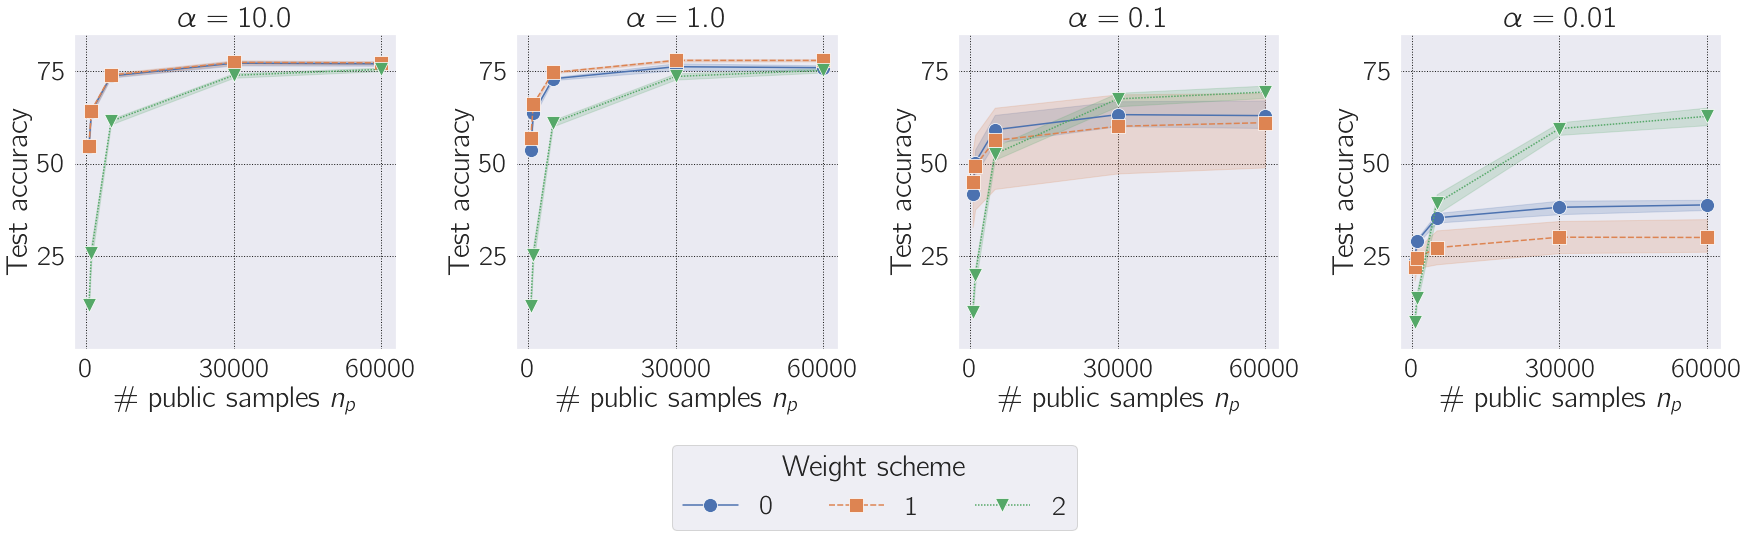

In [10]:
seeds = [1,2,3,4,5]
n_clients = 10
n_pub = [500, 1000, 5000, 30000, 60000]
model = "emnist_cnn1"
dists = ["niid10.0", "niid1.0", "niid0.1", "niid0.01"]
schemes = [0, 1, 2]
student_model = "cnn2"

data = []
for d in dists:
    for n in n_pub:
        for w in schemes:
            settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
            feded_accs, _ = get_feded_results(settings_files, n, student_model, "mse", w, summary=False)
            for i in seeds:
                data.append([n, feded_accs[i-1], d, w])

df = pd.DataFrame(data, columns=['public samples', 'Test accuracy', 'Dist', 'Scheme'])

fig, ax = plt.subplots(1, 4, figsize=(25, 8))
markers = ['o', 's', 'v']
for i in range(4):
    p = sns.lineplot(ax=ax[i], 
    data=df[df.Dist == dists[i]], 
    x='public samples', 
    y='Test accuracy', 
    hue='Scheme',
    style='Scheme', 
    palette=["C0", "C1", "C2"],
    legend=False)

    for j in range(3):
        p.lines[j].set_marker(markers[j])
        p.lines[j].set_markersize(14)

    ax[i].set_xlabel(r'\# public samples $n_p$')
    ax[i].set_title(r'$\alpha={}$'.format(dists[i][4:]))
    ax[i].set_xticks([0, 30000, 60000])
    ax[i].set_ylim([0, 85])
    ax[i].set_yticks([25, 50, 75])

fig.legend(title='Weight scheme', handles=p.lines, labels=['0', '1', '2'], ncol=3, loc='lower center')

plt.tight_layout()
plt.subplots_adjust(bottom=0.35)
plt.savefig('../../thesis_images/emnist_npub.png', dpi=300)
plt.show()

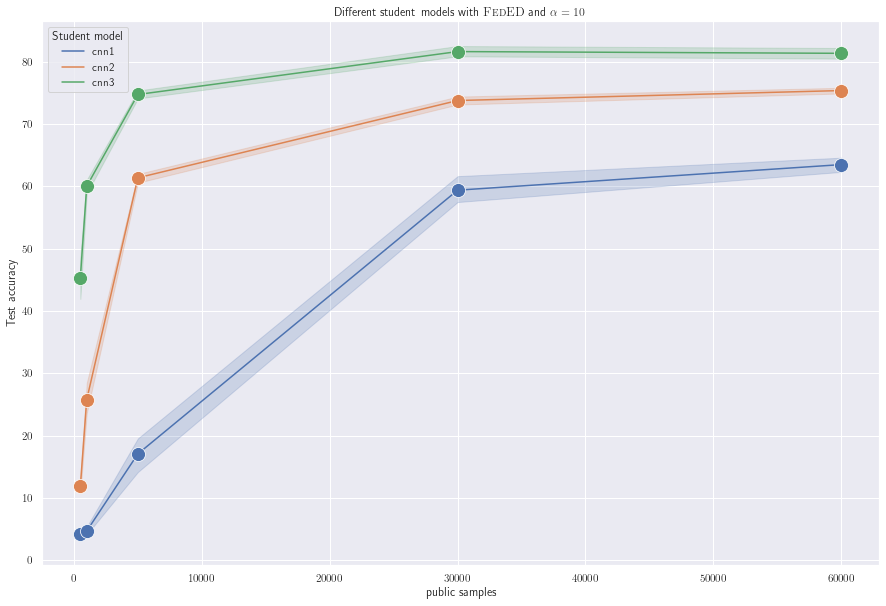

In [26]:
sns.set_theme()
plt.rcParams['text.usetex'] = True
rc('text.latex', preamble=r'\usepackage{cmbright}')
plt.rcParams.update({'font.size': 48})
seeds = [1,2,3,4,5]
n_clients = 10
n_pub = [500, 1000, 5000, 30000, 60000]
model = "emnist_cnn1"
students = ["cnn1", "cnn2", "cnn3"]
dist = "niid10.0"

data = []
for stu in students:
    for n in n_pub:
        settings_files = [f"{model}_c{n_clients}_{dist}_s{i}" for i in seeds]
        feded_accs, _ = get_feded_results(settings_files, n, stu, "mse", 2, summary=False)
        for i in seeds:
            data.append([n, feded_accs[i-1], stu])

df = pd.DataFrame(data, columns=['public samples', 'Test accuracy', 'Student model'])

fig, ax = plt.subplots(1, figsize=(15, 10))
sns.lineplot(ax=ax, data=df, x='public samples', y='Test accuracy', hue='Student model', marker='o', markersize=14)
ax.set_title(r'Different student models with $\textsc{FedED}$ and $\alpha=10$')
plt.show()